In [5]:
import os
os.chdir("/Users/n0362948/desktop/")

In [9]:
import pandas as pd
import numpy as np
new_york_hotel=pd.read_csv('/Users/n0362948/desktop/pycon2017-optimizing-pandas-master/pycon2017-optimizing-pandas-master/MinneAnalytics materials/new_york_hotels.csv',  encoding='ISO-8859-1')

In [10]:
new_york_hotel.head()

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900


In [13]:
%%timeit

new_york_hotel.shape

The slowest run took 14.78 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 2.08 µs per loop


In [14]:
new_york_hotel['distance']=haversin(40.671, -73.985, new_york_hotel['latitude'], new_york_hotel['longitude'])

NameError: name 'haversin' is not defined

In [34]:
clap_prob=0.3
clap_data=np.random.binomial(n=1, p=clap_prob, size=2000)


In [35]:
clap_data

array([0, 0, 1, ..., 1, 0, 1])

In [36]:
import scipy.stats as stats
import matplotlib.pyplot as plt
a=400
b=2000-a

# domain theta
theta_range=np.linspace(0,1,1000)

# prior P(theta)

prior = stats.beta.pdf(x=theta_range,a=a, b=b)


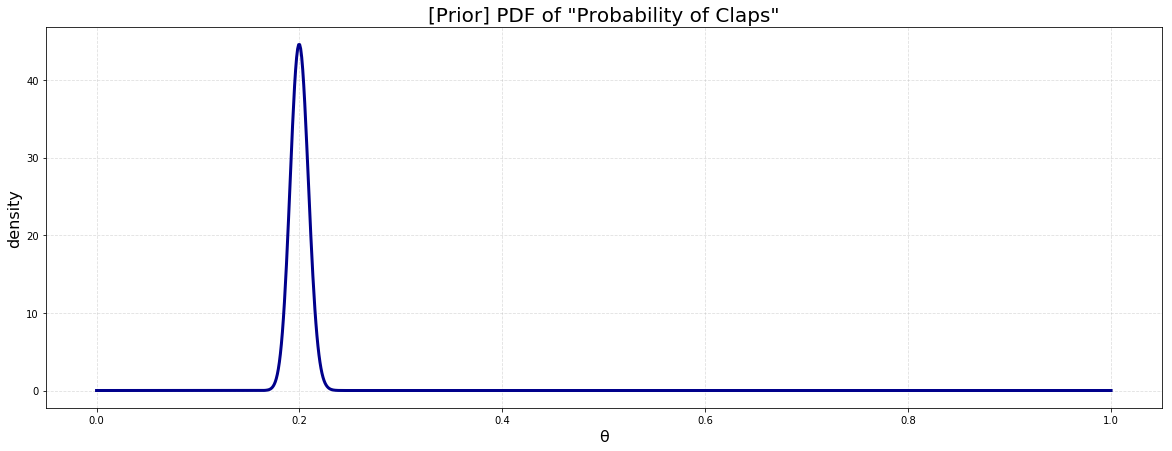

In [37]:
# plotting the prior distribution 

plt.rcParams['figure.figsize']=[20,7]

fig, ax = plt.subplots()

plt.plot(theta_range, prior, linewidth=3, color='darkblue')

# add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)

# add X and Y label 
plt.xlabel('θ', fontsize=16)
plt.ylabel('density', fontsize=16)

# add a grid 
plt.grid(alpha=0.4, linestyle='--')


# show the plot
plt.show()









In [ ]:
### step two is to do the likelihood (or sampling distribution). the probablity of seeing data X given theta

In [ ]:
# the sampling distribution P(X|θ) with a given clap_prob(θ)

In [38]:
likelihood=stats.binom.pmf(k=np.sum(clap_data), n=len(clap_data), p=clap_prob)

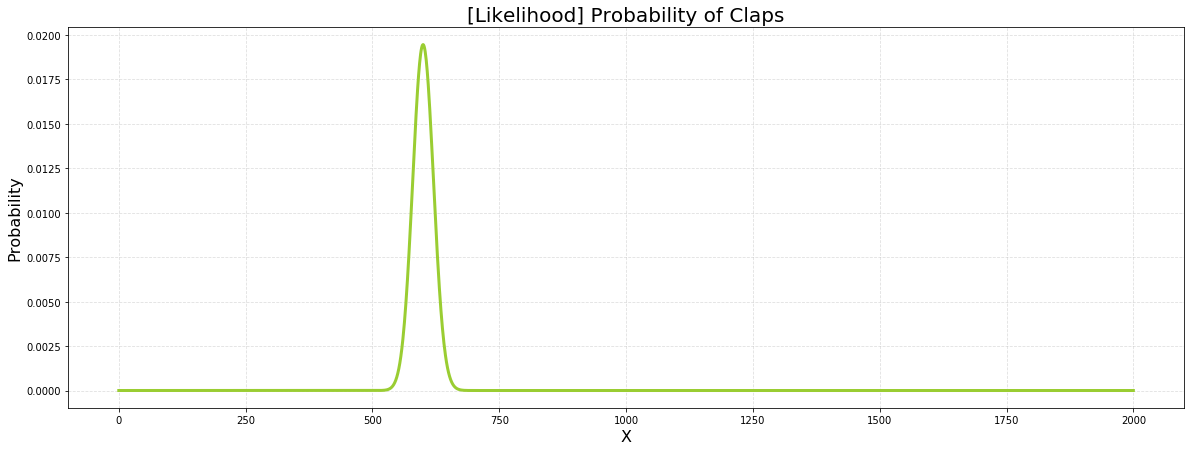

In [41]:
# plot the graph of P(X|θ) for all possible X’s and a specific θ(=0.3).

# Domain (# of claps)

X=np.arange(0,len(clap_data)+1)

# likelihood P(X|θ) for all X's
likelihood=stats.binom.pmf(k=X, n=len(clap_data), p=clap_prob)

# Create the plot
fig, ax=plt.subplots()

plt.plot(X, likelihood, linewidth=3, color='yellowgreen')

# add a title
plt.title('[Likelihood] Probability of Claps', fontsize=20)


# add X label and Y label
plt.xlabel('X', fontsize=16)
plt.ylabel('Probability', fontsize=16)

# add a grid
plt.grid(alpha=.4, linestyle='--')


plt.show()



In [50]:
# X.mean(), theta_range, 
likelihood.sum()

1.0000000000008311

In [52]:
X

array([   0,    1,    2, ..., 1998, 1999, 2000])

In [53]:
theta_range_e = theta_range + 0.001 
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 

############################################
# plot the graph of P(X|θ) for all possible X’s and a specific θ(=0.3).
# Domain (# of claps)
X_1=np.arange(0,len(clap_data)+1)
# likelihood P(X|θ) for all X's
likelihood_2=stats.binom.pmf(k=X_1, n=len(clap_data), p=clap_prob)
############################################

posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)

0.018302468710482061

In [59]:
theta_range_e = theta_range + 0.001 
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 
posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)

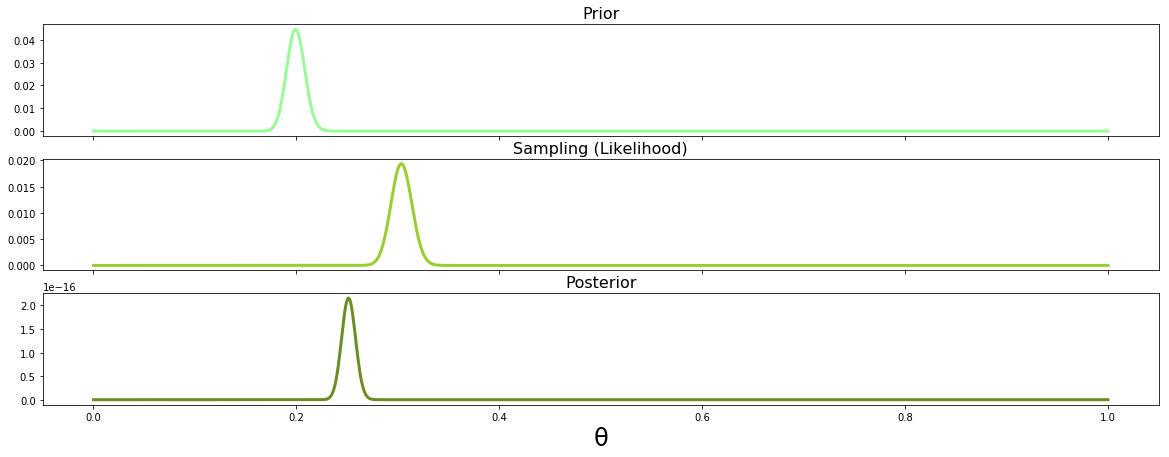

In [60]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

In [77]:
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = clap_prob)
likelihood

0.018302468710482061